In [18]:
import sys
sys.path.append("../..")

import helper as hlp
import pandas as pd
import numpy as np

In [2]:
EPOCHS = 50
MAX_LEN = 50
N_CLASSES = 7
BATCH_SIZE = 64
LEARNING_RATE = 2e-5
NAME = 'distel(roberta)'
MODEL_NAME = 'distilroberta-base'
dir = '../../../Dataset/Updated_Dataset'
path = f'D:/IBA_Other_works/MS Work/Depression/Code/Models/Multi/saved_models/{NAME}'
class_names = ['neutral', 'sadness', 'joy', 'anger', 'surprise', 'fear', 'disgust']

In [3]:
train_df = pd.read_csv(f'{dir}/train_data.csv')
val_df = pd.read_csv(f'{dir}/val_data.csv')
test_df = pd.read_csv(f'{dir}/test_data.csv')

train_texts = train_df['tweet'].values
val_texts = val_df['tweet'].values
test_texts = test_df['tweet'].values

In [4]:
train_df

,tweet,label,aspect,anger,disgust,fear,joy,neutral,sadness,surprise,char_length,word_length
0,the first batch of invitations to the power wr...,0,neutral,0,0,0,0,1,0,0,124,26
1,do not make me do the emotional labor of answe...,1,neutral,0,0,0,0,1,0,0,58,13
2,in politicalmedical news there be an impact st...,0,surprise,0,0,0,0,0,0,1,69,12
3,there be no product in sf,0,sadness,0,0,0,0,0,1,0,25,6
4,dad look bianca it be the first time you dress...,0,surprise,0,0,0,0,0,0,1,82,18
...,...,...,...,...,...,...,...,...,...,...,...,...
5416,i be completely worthless,1,sadness,0,0,0,0,0,1,0,25,4
5417,lesson if you do not do the work it will not work,0,sadness,0,0,0,0,0,1,0,49,12
5418,fyi someone be scamming my followers with a fa...,0,sadness,0,0,0,0,0,1,0,192,38
5419,watch the new campaign video an amaze inspire ...,0,surprise,0,0,0,0,0,0,1,82,16


In [5]:
train_labels = train_df[class_names].values
val_labels = val_df[class_names].values
test_labels = test_df[class_names].values

In [6]:
train_labels

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=int64)

In [7]:
#show 5 values along with their labels
for i in range(5):
    print(train_texts[i], train_labels[i])

the first batch of invitations to the power write course be go out now spring21 batch if you get an email from ben you be in [1 0 0 0 0 0 0]
do not make me do the emotional labor of answer how be you [1 0 0 0 0 0 0]
in politicalmedical news there be an impact stool in our body politic [0 0 0 0 1 0 0]
there be no product in sf [0 1 0 0 0 0 0]
dad look bianca it be the first time you dress up like an anime girl me die inside [0 0 0 0 1 0 0]


In [8]:
#show 5 values along with their labels
for i in range(5):
    print(hlp.preprocess_text(train_texts[i])
    , train_labels[i])

first batch invitations power write course go spring21 batch get email ben [1 0 0 0 0 0 0]
make emotional labor answer [1 0 0 0 0 0 0]
politicalmedical news impact stool body politic [0 0 0 0 1 0 0]
product sf [0 1 0 0 0 0 0]
dad look bianca first time dress like anime girl die inside [0 0 0 0 1 0 0]


In [9]:
## apply preprocessing to all texts
train_texts = [hlp.preprocess_text(text) for text in train_texts]
val_texts = [hlp.preprocess_text(text) for text in val_texts]
test_texts = [hlp.preprocess_text(text) for text in test_texts]

In [21]:
## mbert model and tokenizer
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = AutoTokenizer.from_pretrained("distilroberta-base")
model = AutoModelForSequenceClassification.from_pretrained("distilroberta-base", num_labels=N_CLASSES)
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
model = model.to(device)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at distilroberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [22]:
train_data_loader = hlp.create_data_loader(train_texts, train_labels, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = hlp.create_data_loader(val_texts, val_labels, tokenizer, MAX_LEN, BATCH_SIZE)

history = hlp.train_model_multi(train_data_loader, val_data_loader, model, optimizer, device, EPOCHS, tokenizer, path)

Epoch 0/50
----------


Training Progress: 100%|██████████| 85/85 [00:28<00:00,  2.97it/s, loss=0.34] 


Train loss 0.4092283950132482 accuracy 0.005718502121379819
Validation loss 0.35238400572224665 accuracy 0.0
No improvement in validation accuracy for 1 epochs.
Epoch 1/50
----------


Training Progress: 100%|██████████| 85/85 [00:25<00:00,  3.33it/s, loss=0.292]


Train loss 0.32470516527400295 accuracy 0.17395314517616675
Validation loss 0.3011978284308785 accuracy 0.39070567986230637
Model and tokenizer saved at epoch 1
Checkpoint saved: Improved validation accuracy at epoch 1: 0.39070567986230637
Epoch 2/50
----------


Training Progress: 100%|██████████| 85/85 [00:25<00:00,  3.31it/s, loss=0.243]


Train loss 0.2742699517923243 accuracy 0.4292565947242206
Validation loss 0.27719628889309733 accuracy 0.44922547332185886
Model and tokenizer saved at epoch 2
Checkpoint saved: Improved validation accuracy at epoch 2: 0.44922547332185886
Epoch 3/50
----------


Training Progress: 100%|██████████| 85/85 [00:26<00:00,  3.26it/s, loss=0.205]


Train loss 0.23042333459152894 accuracy 0.5633646928610957
Validation loss 0.26460927254275274 accuracy 0.5292598967297762
Model and tokenizer saved at epoch 3
Checkpoint saved: Improved validation accuracy at epoch 3: 0.5292598967297762
Epoch 4/50
----------


Training Progress: 100%|██████████| 85/85 [00:31<00:00,  2.73it/s, loss=0.16] 


Train loss 0.1944509076721528 accuracy 0.6555985980446412
Validation loss 0.26484187574763046 accuracy 0.5413080895008606
Model and tokenizer saved at epoch 4
Checkpoint saved: Improved validation accuracy at epoch 4: 0.5413080895008606
Epoch 5/50
----------


Training Progress: 100%|██████████| 85/85 [00:26<00:00,  3.18it/s, loss=0.147]


Train loss 0.17163276882732617 accuracy 0.720162331673123
Validation loss 0.29026849097327184 accuracy 0.5249569707401033
No improvement in validation accuracy for 1 epochs.
Epoch 6/50
----------


Training Progress: 100%|██████████| 85/85 [00:25<00:00,  3.33it/s, loss=0.0888]


Train loss 0.1478723050916896 accuracy 0.7666482198856299
Validation loss 0.28186668690882233 accuracy 0.5533562822719449
Model and tokenizer saved at epoch 6
Checkpoint saved: Improved validation accuracy at epoch 6: 0.5533562822719449
Epoch 7/50
----------


Training Progress: 100%|██████████| 85/85 [00:25<00:00,  3.27it/s, loss=0.096] 


Train loss 0.12091431626502205 accuracy 0.8208817561335547
Validation loss 0.27404165973788813 accuracy 0.5955249569707401
Model and tokenizer saved at epoch 7
Checkpoint saved: Improved validation accuracy at epoch 7: 0.5955249569707401
Epoch 8/50
----------


Training Progress: 100%|██████████| 85/85 [00:26<00:00,  3.24it/s, loss=0.0623]


Train loss 0.10242704223184025 accuracy 0.8535325585685298
Validation loss 0.2965235231738341 accuracy 0.5929432013769363
No improvement in validation accuracy for 1 epochs.
Epoch 9/50
----------


Training Progress: 100%|██████████| 85/85 [00:26<00:00,  3.24it/s, loss=0.0306]


Train loss 0.08821307089837159 accuracy 0.8751152923814794
Validation loss 0.3134294575766513 accuracy 0.5929432013769363
No improvement in validation accuracy for 2 epochs.
Epoch 10/50
----------


Training Progress: 100%|██████████| 85/85 [00:25<00:00,  3.34it/s, loss=0.0248]


Train loss 0.0763715448186678 accuracy 0.8959601549529607
Validation loss 0.3166469476724926 accuracy 0.5886402753872634
No improvement in validation accuracy for 3 epochs.
Epoch 11/50
----------


Training Progress: 100%|██████████| 85/85 [00:26<00:00,  3.24it/s, loss=0.0393]


Train loss 0.06894960158011493 accuracy 0.9064748201438849
Validation loss 0.32971417903900146 accuracy 0.5869191049913941
No improvement in validation accuracy for 4 epochs.
Epoch 12/50
----------


Training Progress: 100%|██████████| 85/85 [00:26<00:00,  3.15it/s, loss=0.039] 


Train loss 0.054231235494508465 accuracy 0.9321158457849106
Validation loss 0.34108065304003266 accuracy 0.5981067125645438
Model and tokenizer saved at epoch 12
Checkpoint saved: Improved validation accuracy at epoch 12: 0.5981067125645438
Epoch 13/50
----------


Training Progress: 100%|██████████| 85/85 [00:26<00:00,  3.24it/s, loss=0.0197]


Train loss 0.045237983500256256 accuracy 0.9433683822173031
Validation loss 0.36354919483787135 accuracy 0.5860585197934596
No improvement in validation accuracy for 1 epochs.
Epoch 14/50
----------


Training Progress: 100%|██████████| 85/85 [00:26<00:00,  3.20it/s, loss=0.0112]


Train loss 0.04019335216897375 accuracy 0.951300498063088
Validation loss 0.35784135523595306 accuracy 0.5972461273666093
No improvement in validation accuracy for 2 epochs.
Epoch 15/50
----------


Training Progress: 100%|██████████| 85/85 [00:25<00:00,  3.27it/s, loss=0.0245]


Train loss 0.033443247998023735 accuracy 0.9610772920125438
Validation loss 0.3970160892135219 accuracy 0.5748709122203098
No improvement in validation accuracy for 3 epochs.
Epoch 16/50
----------


Training Progress: 100%|██████████| 85/85 [00:25<00:00,  3.34it/s, loss=0.0367]


Train loss 0.03457634349298828 accuracy 0.9584947426674045
Validation loss 0.3841950689491473 accuracy 0.5920826161790017
No improvement in validation accuracy for 4 epochs.
Epoch 17/50
----------


Training Progress: 100%|██████████| 85/85 [00:26<00:00,  3.26it/s, loss=0.00851]


Train loss 0.029149824150783175 accuracy 0.9653200516509869
Validation loss 0.4189144529794392 accuracy 0.5886402753872634
No improvement in validation accuracy for 5 epochs.
Stopping early due to lack of improvement in validation accuracy.


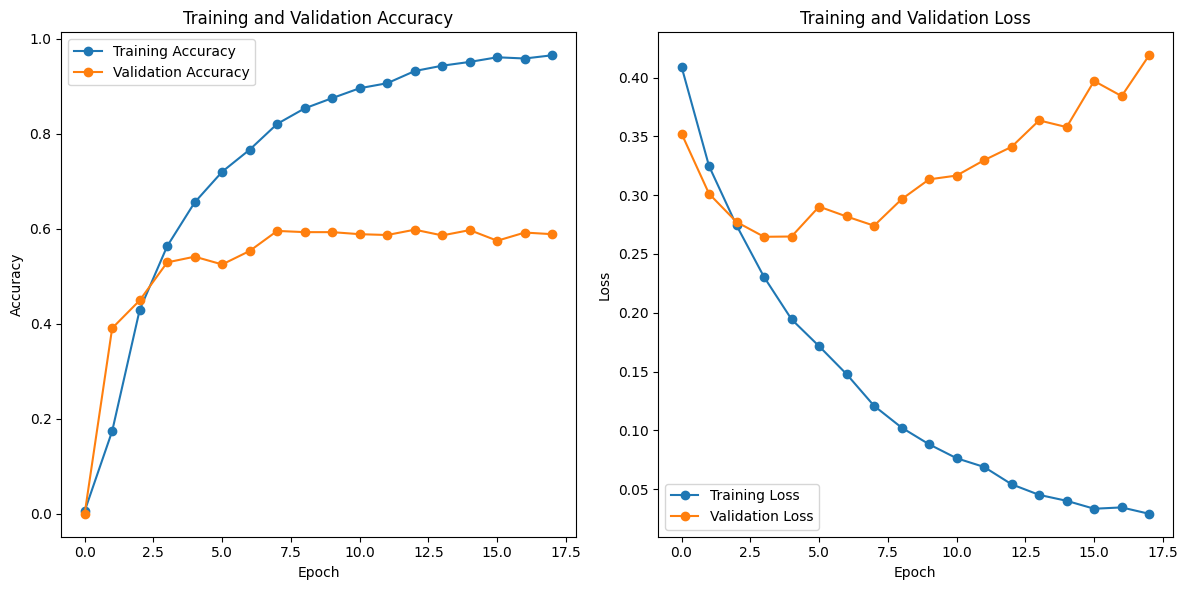

In [23]:
hlp.plot_history(history)

In [10]:
import os
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

def extract_epoch_number(dir):
    files = os.listdir(dir)
    epoch = 0
    for file in files:
        if 'model_epoch' in file:
            epoch = max(epoch, int(file.split('_')[-1]))
    return epoch

path = f'D:/IBA_Other_works/MS Work/Depression/Code/Models/Multi/saved_models/{NAME}'
epoch = extract_epoch_number(path)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = AutoTokenizer.from_pretrained(f'{path}/tokenizer')
model = AutoModelForSequenceClassification.from_pretrained(f'{path}/model_epoch_{epoch}', num_labels=N_CLASSES)
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
model = model.to(device)

In [12]:
test_data_loader = hlp.create_data_loader(test_texts, test_labels, tokenizer, MAX_LEN, BATCH_SIZE)

test_acc, test_loss, test_label_actual, test_label_pred = hlp.eval_model_multi(model, test_data_loader, device)

print(f'Test Accuracy: {test_acc} Test Loss: {test_loss}')

Test Accuracy: 0.5800344234079173 Test Loss: 0.33977400785998296


Accuracy: 0.62
F1 Score: 0.62
Precision: 0.64
Recall: 0.62

Classification Report:
              precision    recall  f1-score   support

     neutral       0.70      0.65      0.67       445
     sadness       0.68      0.65      0.66       248
         joy       0.61      0.52      0.57       241
       anger       0.52      0.56      0.54       113
    surprise       0.34      0.77      0.47        39
        fear       0.58      0.59      0.58        70
     disgust       0.20      0.67      0.31         6

    accuracy                           0.62      1162
   macro avg       0.52      0.63      0.54      1162
weighted avg       0.64      0.62      0.62      1162



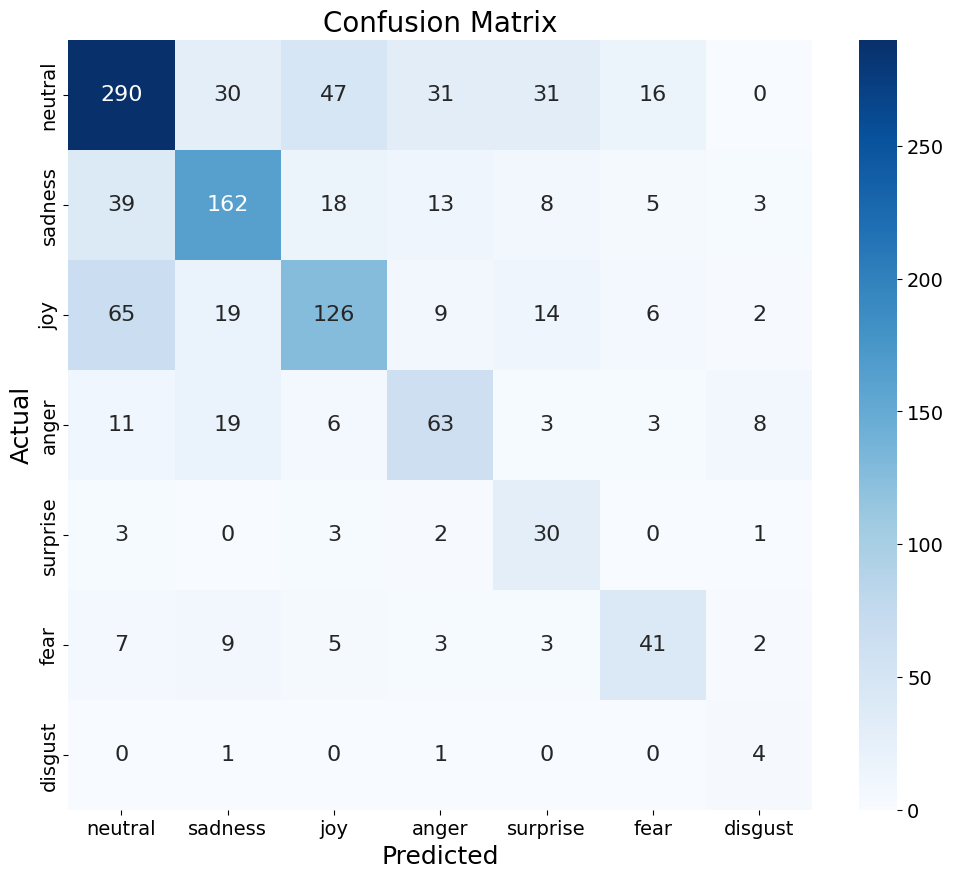

In [20]:
hlp.plot_confusion_matrix(np.argmax(test_label_actual, axis=1), np.argmax(test_label_pred, axis=1), class_names)